In [ ]:
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [ ]:
class SoftmaxClassfication(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SoftmaxClassfication, self).__init__()
        self.linear1=nn.Linear(input_dim, 10)
        self.linear2=nn.Linear(10, output_dim)

    def forward(self, x):
          x=self.linear1(x)
          x=nn.Sigmoid()(x)
          x=self.linear2(x)
          x=nn.Softmax()(x)
          return x

In [ ]:
x,y=load_iris(return_X_y=True)
y=y.reshape(-1,1)
scaler=StandardScaler()
x=scaler.fit_transform(x)
y=OneHotEncoder(sparse=False).fit_transform(y)
print(y)
x=torch.tensor(x, dtype=torch.float32).to('cuda')
y=torch.tensor(y, dtype=torch.float32).to('cuda')
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
x.shape, y.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(torch.Size([150, 4]),
 torch.Size([150, 3]),
 torch.Size([120, 4]),
 torch.Size([30, 4]),
 torch.Size([120, 3]),
 torch.Size([30, 3]))

In [ ]:
model=SoftmaxClassfication(4,3)
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.AdamW(model.parameters(), lr=0.01)

In [ ]:
model.train()
losses=[]
epoch=[]
model.to('cuda')
for i in range(100):
  optimizer.zero_grad()
  y_pred=model.forward(x_train)
  loss=loss_fn(y_pred, y_train)
  loss.backward()
  optimizer.step()
  losses.append(loss.item())
  epoch.append(i)
  if i%10==0:
    model.eval()
    with torch.inference_mode():
      y_pred=model.forward(x_test)
      loss=loss_fn(y_pred, y_test)
  print(loss)
  model.train()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor(0.6680, device='cuda:0')
tensor(0.6938, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.6921, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.6903, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.6886, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.6869, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.6852, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.6835, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.6818, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.6801, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.6555, device='cuda:0')
tensor(0.6768, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.6751, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.6735, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.6719, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.6703, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.6687, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.6671, device='cuda:0', grad_fn=<DivBackward1>)
tensor(0.6656, device='cuda:0', grad_fn=

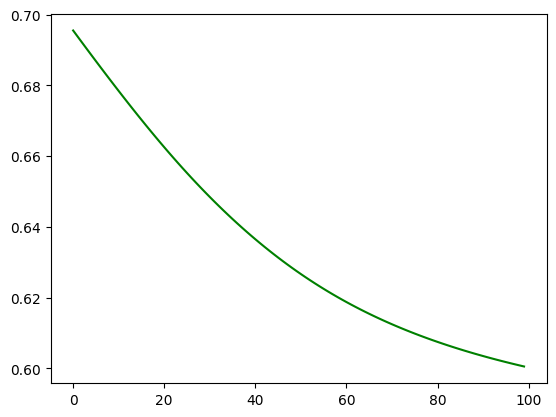

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epoch, losses,'g')
plt.show()